### Import necessary libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from sklearn.utils import shuffle
from skimage.transform import resize

### Read all the file names in all 4 folders (jerry, tom, tom_jerry_0, tom_jerry_1)

In [4]:
INDIA = glob.glob('INDIA/*.jpg')
Other_Teams = glob.glob('Other Teams/*.jpg')

### Read image data from all files and store it in a variable, Store the label as well

In [7]:
image = []
label = []

for i in INDIA:
    img = plt.imread(i)
    image.append(img)
    label.append(0)
    
for i in Other_Teams:
    img = plt.imread(i)
    image.append(img)
    label.append(1)
    

### Plot some of the images

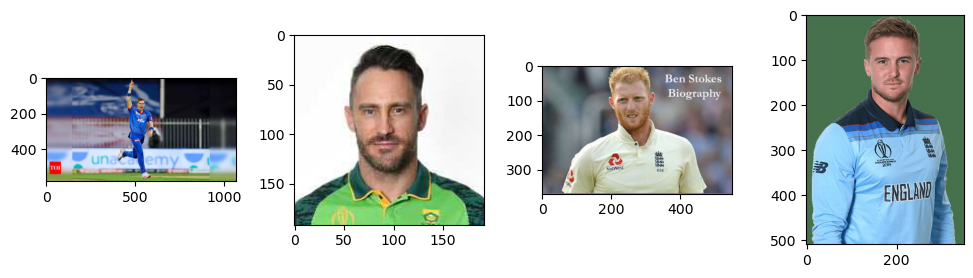

In [48]:
plt.figure(figsize = (10,8))
for i in range(4):
    plt.subplot(3,4,i+1)
    plt.imshow(image[i])
plt.tight_layout()

### Shuffle images and labels 

In [72]:
image, label = shuffle(image, label)

### Plot the images once again

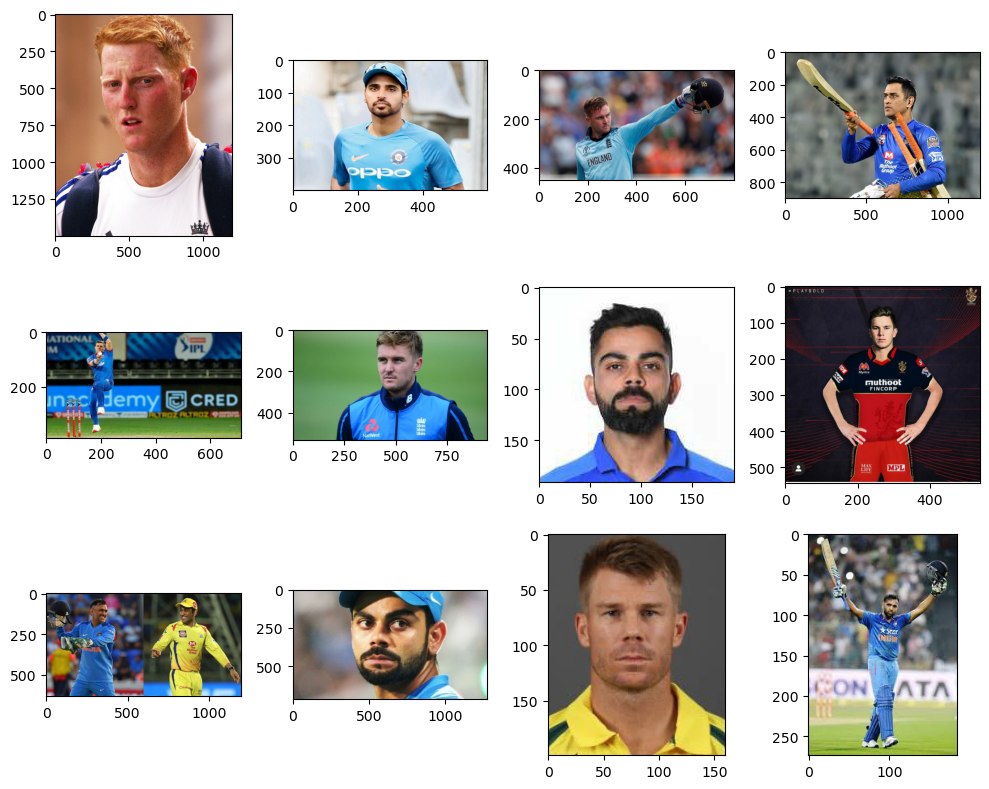

In [75]:
plt.figure(figsize = (10,8))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(image[i])
plt.tight_layout()

### Check the shape of some of the images

In [15]:
for i in range(10):
    print(image[i].shape)

(580, 1069, 3)
(192, 192, 3)
(370, 550, 3)
(509, 350, 3)
(750, 900, 3)
(750, 900, 3)
(230, 345, 3)
(192, 192, 3)
(720, 1280, 3)
(600, 2000, 3)


### Resize all the images to a same height and width

In [17]:
X = []

for i in image:
    X.append(resize(i, (500,500,3)))

### Convert images and labels to numpy array and store them as X and y variables

In [19]:
X = np.array(X)

In [20]:
y = np.array(label)

### Reshape the images to 1 dimension

In [22]:
d1, d2, d3, d4 = X.shape

In [23]:
X = X.reshape((d1, d2*d3*d4))

### Train test Split

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

### Create SVM Model and train it

In [28]:
from sklearn.svm import SVC

In [29]:
model = SVC()

In [30]:
%time model.fit(X_train, y_train)

CPU times: total: 53.4 s
Wall time: 29.3 s


SVC()

### Make predictions with X_test

In [32]:
%time y_pred = model.predict(X_test)

CPU times: total: 1min 34s
Wall time: 52.5 s


### Evaluate the model

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [35]:
accuracy_score(y_test,y_pred)

0.8333333333333334

<Axes: >

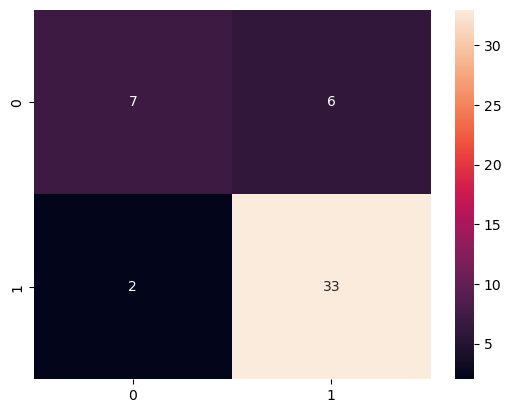

In [36]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True)

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.54      0.64        13
           1       0.85      0.94      0.89        35

    accuracy                           0.83        48
   macro avg       0.81      0.74      0.76        48
weighted avg       0.83      0.83      0.82        48



***